In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the datasets
customers_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [3]:
# Preprocessing Customers data
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year

label_encoder = LabelEncoder()
customers_df['RegionEncoded'] = label_encoder.fit_transform(customers_df['Region'])

In [4]:
# Aggregate Transactions data
transactions_summary = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).rename(columns={'TotalValue': 'TotalSpending', 'Quantity': 'TotalItems', 'TransactionID': 'TransactionCount'}).reset_index()

In [5]:
# Merge datasets
merged_df = pd.merge(customers_df, transactions_summary, on='CustomerID', how='left')
merged_df.fillna(0, inplace=True)


In [6]:
# Feature selection
features = merged_df[['SignupYear', 'RegionEncoded', 'TotalSpending', 'TotalItems', 'TransactionCount']]

In [7]:
# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Dimensionality reduction with PCA
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

In [9]:
# Agglomerative Clustering with Single Linkage
agglo = AgglomerativeClustering(n_clusters=3, linkage='single')
merged_df['Agglo_Cluster'] = agglo.fit_predict(reduced_features)

In [10]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(reduced_features, merged_df['Agglo_Cluster'])

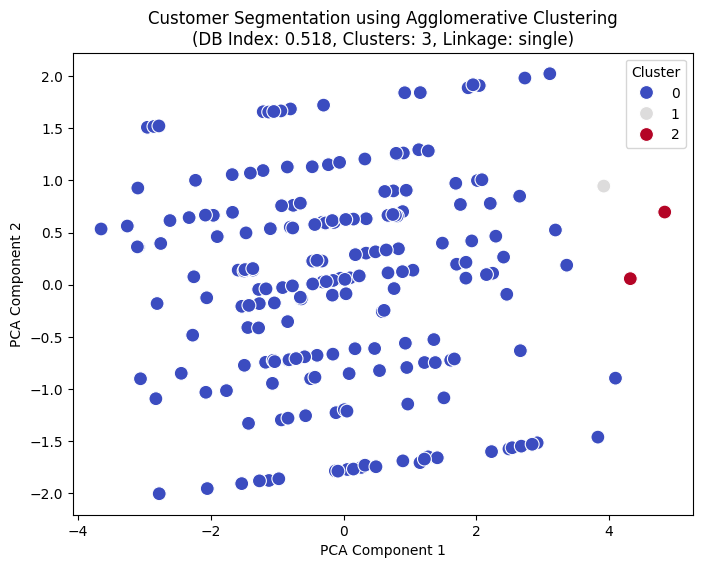

In [11]:
# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1],
    hue=merged_df['Agglo_Cluster'], palette='coolwarm', edgecolor='w', s=100
)
plt.title(f'Customer Segmentation using Agglomerative Clustering\n(DB Index: {db_index:.3f}, Clusters: 3, Linkage: single)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

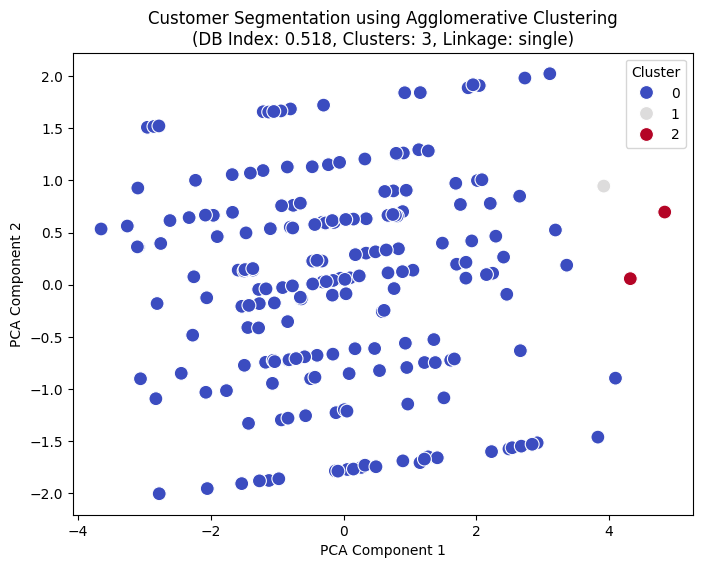

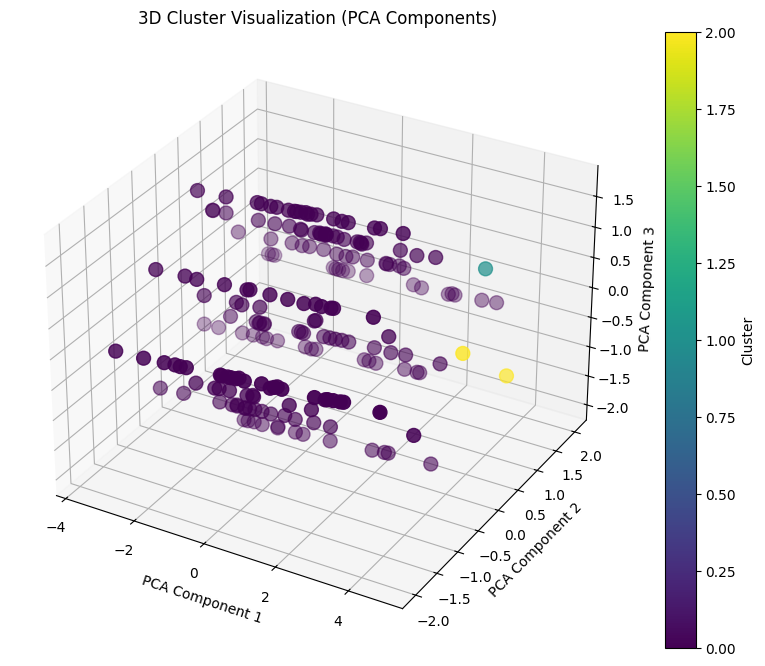

<ipython-input-13-471dd7712436>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_df['Agglo_Cluster'], palette='viridis')


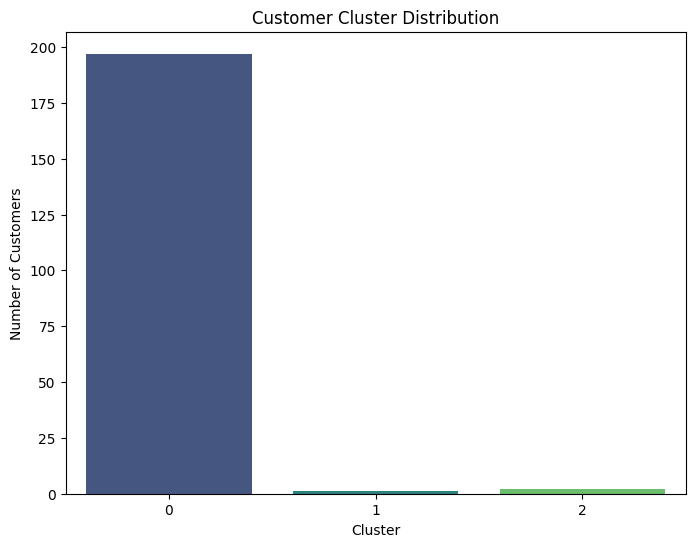

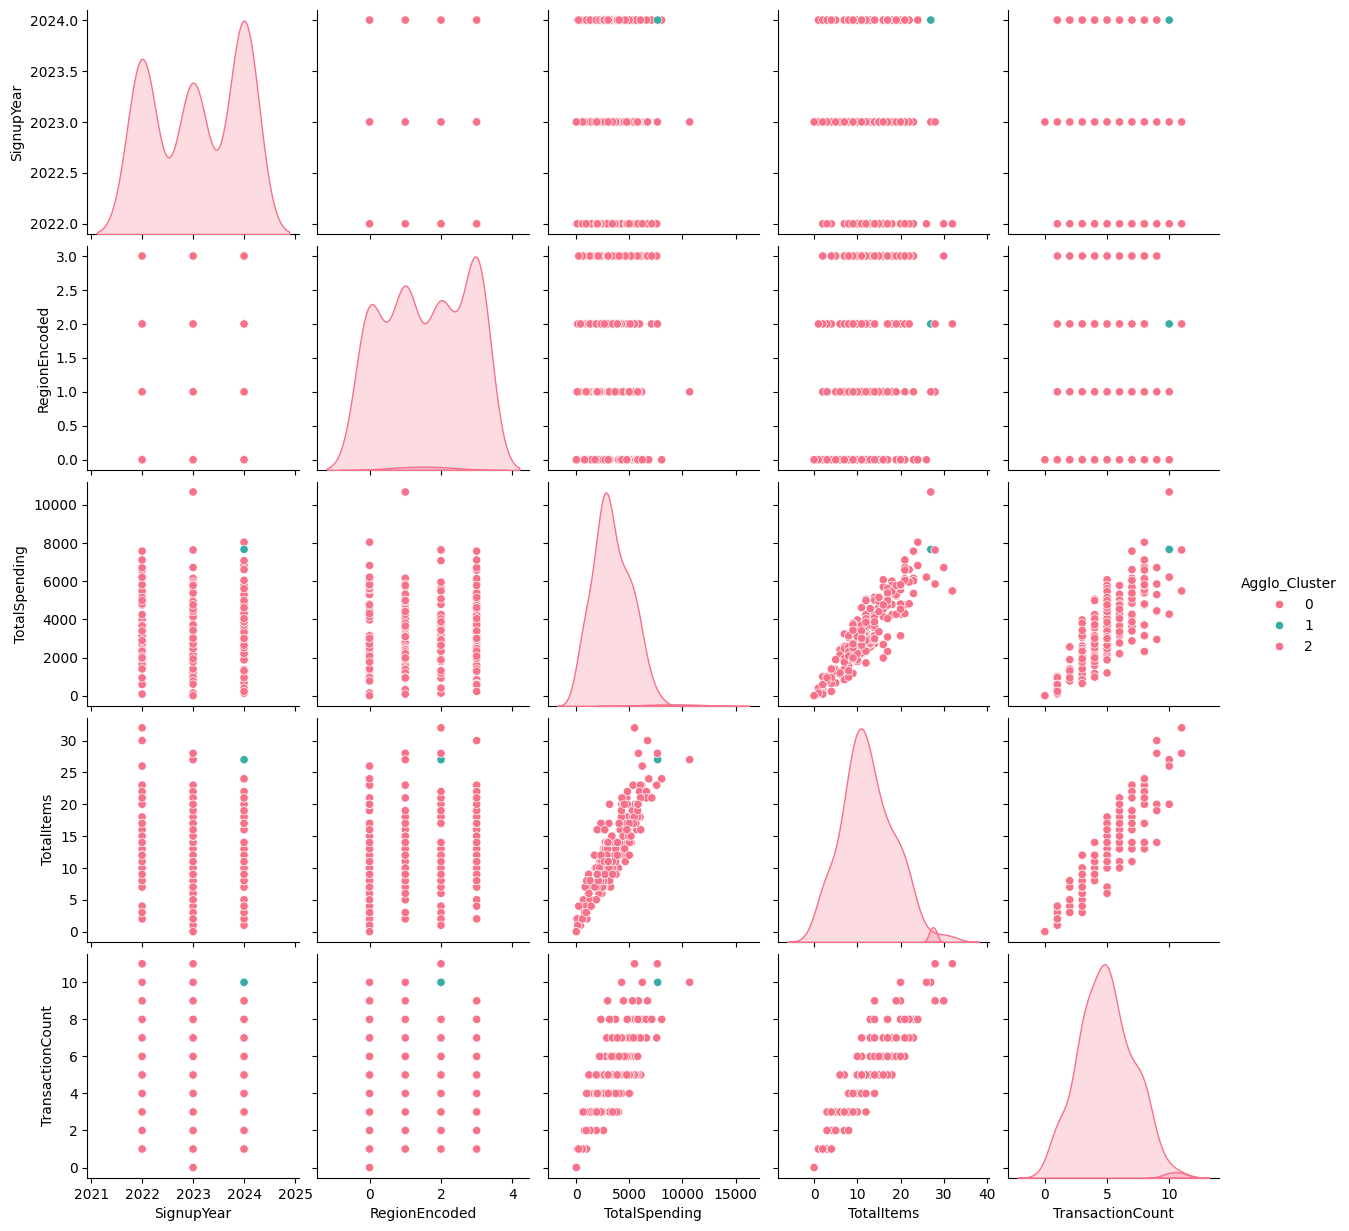

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter Plot (2D Visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1],
    hue=merged_df['Agglo_Cluster'], palette='coolwarm', edgecolor='w', s=100
)
plt.title(f'Customer Segmentation using Agglomerative Clustering\n(DB Index: {db_index:.3f}, Clusters: 3, Linkage: single)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 3D Scatter Plot of Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
    c=merged_df['Agglo_Cluster'], cmap='viridis', s=100
)
ax.set_title('3D Cluster Visualization (PCA Components)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Cluster Distribution Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_df['Agglo_Cluster'], palette='viridis')
plt.title('Customer Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Pairplot for Feature Visualization
sns.pairplot(merged_df[['SignupYear', 'RegionEncoded', 'TotalSpending', 'TotalItems', 'TransactionCount', 'Agglo_Cluster']],
             hue='Agglo_Cluster', palette='husl', diag_kind='kde')
plt.show()


In [12]:
# Final Results
print("Optimal Clusters: 3")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print("Cluster Sizes:", merged_df['Agglo_Cluster'].value_counts().to_dict())

Optimal Clusters: 3
Davies-Bouldin Index: 0.518
Cluster Sizes: {0: 197, 2: 2, 1: 1}
